In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Conv2D,MaxPool2D,Flatten,BatchNormalization, Input, Layer,Dropout, GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D, MaxPooling2D, Concatenate, Activation, Add, ReLU, LeakyReLU, PReLU, ELU, Softmax, ZeroPadding2D, UpSampling2D, Conv2DTranspose, Reshape, Lambda, Multiply, Dot, Permute, LSTM, Bidirectional, GRU, TimeDistributed, ConvLSTM2D, BatchNormalization, LayerNormalization, GaussianNoise, GaussianDropout, Embedding, RepeatVector, Attention, AdditiveAttention, MultiHeadAttention, LayerNormalization, GaussianNoise, GaussianDropout, Embedding, RepeatVector, Attention, AdditiveAttention, MultiHeadAttention, Dropout
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError, BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError, BinaryAccuracy, FalseNegatives, FalsePositives, TrueNegatives, TruePositives, Precision, Recall,AUC
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback ,CSVLogger, LearningRateScheduler
import sklearn
from sklearn.metrics import confusion_matrix, classification_report,roc_curve


## Data Prep

In [2]:
dataset,dataset_info=tfds.load('malaria',with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

In [3]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):

    DATASET_SIZE=len(dataset)
    train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
    val_test_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    val_dataset=val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
    test_dataset=val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
    return train_dataset,val_dataset,test_dataset

In [4]:
for data in dataset[0].take(4):
    print(data)

(<tf.Tensor: shape=(145, 148, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(133, 127, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [5]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
train_dataset, val_dataset, test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]


In [6]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\nagra\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin 

## Data Visualization

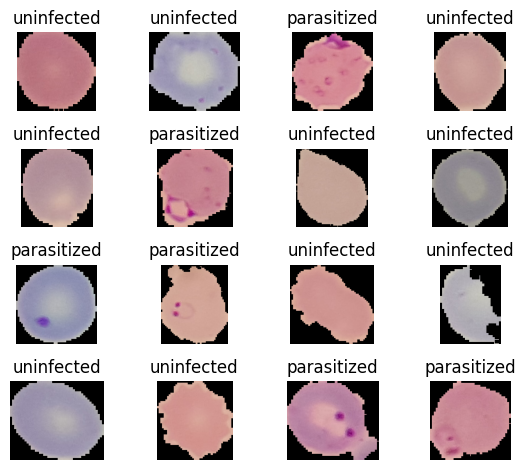

In [7]:
for i, (image,label) in enumerate(train_dataset.take(16)):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis('off')
    plt.tight_layout()

In [8]:
dataset_info.features['label'].int2str(0)

'parasitized'

## Data Pre-Processing

In [9]:
# Standardize or Normalize the images? Read how o decide! 

In [10]:
IMSIZE=224
def resize_rescale(image,label):
    return tf.image.resize(image,(IMSIZE,IMSIZE))/255.0, label

In [11]:
train_dataset=train_dataset.map(resize_rescale)
val_dataset=val_dataset.map(resize_rescale)
test_dataset=test_dataset.map(resize_rescale)

In [12]:
for image,label in train_dataset.take(1):
    print(image)
    print(label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)


In [13]:
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [14]:
val_dataset=val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [29]:
droupout_rate=0.2

## Sequential Model

In [32]:
#LeNet
model=tf.keras.Sequential([InputLayer(input_shape=(IMSIZE,IMSIZE,3)),
                           Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_regularizer=L2(0.01)),
                           BatchNormalization(),
                           MaxPool2D(pool_size=2,strides=2),
                           Dropout(droupout_rate),
                           Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_regularizer=L2(0.01)),
                           BatchNormalization(),

                           MaxPool2D(pool_size=2,strides=2),
                           Dropout(droupout_rate),

                           Flatten(),

                           Dense(100,activation="relu",kernel_regularizer=L2(0.01)),
                           BatchNormalization(),
                           Dropout(droupout_rate),

                           Dense(10,activation="relu",  kernel_regularizer=L2(0.01)),
                           BatchNormalization(),
                           Dense(1,activation="sigmoid",  kernel_regularizer=L2(0.01)),

                           
                           ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_20 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_21 (Bat  (None, 109, 109, 16)    

## Functional API

In [16]:
func_input = Input(shape=(IMSIZE,IMSIZE,3), name='Input Image')
x=Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu')(func_input)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=2,strides=2)(x)

x=Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu')(x)
x=BatchNormalization()(x)
output=MaxPool2D(pool_size=2,strides=2)(x)
lenet_model_extrator=Model(inputs=func_input,outputs=output,name='LeNet_Extractor')
lenet_model_extrator.summary()

Model: "LeNet_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         


                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 16)       0         
 2D)      

In [17]:
func_input = Input(shape=(IMSIZE,IMSIZE,3), name='Input Image')
x=lenet_model_extrator(func_input)
x=Flatten()(x)
x=Dense(100,activation="relu")(x)
x=BatchNormalization()(x)
x=Dense(10,activation="relu")(x)
x=BatchNormalization()(x)
func_output=Dense(1,activation="sigmoid")(x)
model=Model(inputs=func_input, outputs=func_output, name='LeNet')
model.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 LeNet_Extractor (Functional  (None, 54, 54, 16)       1136      
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                1010  

## Model Subclassing

In [18]:
class FeatureExtractor(Layer):
    def __init__(self, filters,kernel_size,strides,padding,activation,pool_size,**kwargs):
        super(FeatureExtractor, self).__init__(**kwargs)
        self.conv1 = Conv2D(filters = filters,kernel_size = kernel_size,strides = strides,padding = padding,activation=activation)
        self.bn1 = BatchNormalization()
        self.pool1 = MaxPool2D(pool_size=pool_size,strides=2*strides)
        self.conv2 = Conv2D(filters=filters*2,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
        self.bn2 = BatchNormalization()
        self.pool2 = MaxPool2D(pool_size=pool_size,strides=2*strides)
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        return self.pool2(x)

feature_extractor = FeatureExtractor(8,3,1,'valid','relu',2,name='Feature_Extractor')

In [19]:
func_input = Input(shape=(IMSIZE,IMSIZE,3), name='Input Image')
x=feature_extractor(func_input)
x=Flatten()(x)
x=Dense(100,activation="relu")(x)
x=BatchNormalization()(x)
x=Dense(10,activation="relu")(x)
x=BatchNormalization()(x)
func_output=Dense(1,activation="sigmoid")(x)
model=Model(inputs=func_input, outputs=func_output, name='LeNet')
model.summary()

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (FeatureE  (None, 54, 54, 16)       1488      
 xtractor)                                                       
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 10)                1010  

In [20]:
class Lenet(Model):
    def __init__(self,**kwargs):
        super(Lenet, self).__init__(**kwargs)
        self.feature_extractor=FeatureExtractor(8,3,1,'valid','relu',2,name='Feature_Extractor')
        self.flatten=Flatten()
        self.dense1=Dense(100,activation="relu")
        self.bn1=BatchNormalization()
        self.dense2=Dense(10,activation="relu")
        self.bn2=BatchNormalization()
        self.dense3=Dense(1,activation="sigmoid")

    def call(self, x):
        x = self.feature_extractor(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.bn1(x)
        x = self.dense2(x)
        x = self.bn2(x)
        return self.dense3(x)
  

Lenet_Model = Lenet()
Lenet_Model(tf.zeros((1, IMSIZE, IMSIZE, 3)))
Lenet_Model.summary()

Model: "lenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_Extractor (FeatureE  multiple                 1488      
 xtractor)                                                       
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_9 (Dense)             multiple                  4665700   
                                                                 
 batch_normalization_14 (Bat  multiple                 400       
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_15 (Bat  multiple                 40    

## Custom Layers

In [21]:
class CustomDense(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(CustomDense, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="zeros", trainable=True)
    def call(self, inputs):
        return self.activation(tf.matmul(inputs, self.w) + self.b) 

In [22]:
#LeNet
model=tf.keras.Sequential([InputLayer(input_shape=(IMSIZE,IMSIZE,3)),
                           Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
                           BatchNormalization(),
                           MaxPool2D(pool_size=2,strides=2),

                           Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
                           BatchNormalization(),

                           MaxPool2D(pool_size=2,strides=2),

                           Flatten(),

                           CustomDense(100,activation="relu"),
                           BatchNormalization(),
                           CustomDense(10,activation="relu"),
                           BatchNormalization(),
                           CustomDense(1,activation="sigmoid"),

                           
                           ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_16 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_17 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

## Callbacks

In [23]:
class LossCallback(Callback):
    def __init__(self, threshold):
        super(LossCallback, self).__init__()
        self.threshold = threshold
    def on_epoch_end(self, epoch, logs=None):
        if logs["loss"] < self.threshold:
            print(f"\nEpoch {epoch}: Reached loss less than {self.threshold}, stopping training")
            self.model.stop_training = True
    def on_batch_end(self, batch, logs=None):
            print(f"\nBatch {batch}: Reached loss after this batch is {logs}")
            

## CSVLogger

In [24]:
csv_callback=CSVLogger(
    'logs.csv', separator=",", append=True
)


## EarlyStopping

In [25]:
es_callback=EarlyStopping( 
    monitor='val_loss', 
    min_delta=0,
    patience=2, 
    verbose=1, 
    mode='auto', 
    restore_best_weights=False
)

## LR Scheduling

In [26]:
def scheduler(epoch,lr):
    if epoch<10:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
scheduler_callback=LearningRateScheduler(scheduler,verbose=1)

## ReduceLRonPlateau

In [27]:
plateau_callback=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.1, 
    patience=2, 
    verbose=1, 
    mode='auto', 
    min_delta=0.0001, 
    cooldown=0, 
    min_lr=0
)

## Model Checkpoint

In [28]:
checkpoint_callback=ModelCheckpoint(
    'model_checkpoint', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True,
    save_weights_only=True, 
    mode='auto', 
    save_freq='epoch'
)

## Model Training

In [25]:
#Binary Croos ENtropy Loss
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce=tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [26]:
metrics=[TruePositives(name='tp'),FalsePositives(name='fp'),TrueNegatives(name='tn'),FalseNegatives(name='fn'),BinaryAccuracy(name='accuracy'),Precision(name='precision'),Recall(name='recall'),AUC(name='auc')]

In [65]:
Lenet_Model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=metrics)
            

In [66]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9939114411520084355
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254123828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12040778672275246275
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [67]:
history=Lenet_Model.fit(train_dataset,validation_data=val_dataset,epochs=20,verbose=1,callbacks=[plateau_callback,checkpoint_callback,scheduler_callback,csv_callback,es_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20


688/689 [============================>.] - ETA: 0s - loss: 0.1178 - tp: 12045.0000 - fp: 689.0000 - tn: 11682.0000 - fn: 355.0000 - accuracy: 0.9579 - precision: 0.9459 - recall: 0.9714 - auc: 0.9873
Epoch 1: val_loss improved from inf to 0.21375, saving model to model_checkpoint
689/689 [==============================] - 42s 59ms/step - loss: 0.1178 - tp: 12061.0000 - fp: 690.0000 - tn: 11695.0000 - fn: 355.0000 - accuracy: 0.9579 - precision: 0.9459 - recall: 0.9714 - auc: 0.9873 - val_loss: 0.2138 - val_tp: 1357.0000 - val_fp: 101.0000 - val_tn: 1260.0000 - val_fn: 37.0000 - val_accuracy: 0.9499 - val_precision: 0.9307 - val_recall: 0.9735 - val_auc: 0.9776 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/20
688/689 [============================>.] - ETA: 0s - loss: 0.1146 - tp: 10663.0000 - fp: 525.0000 - tn: 10477.0000 - fn: 351.0000 - accuracy: 0.9602 - precision: 0.9531 - recall: 0.9681 - auc: 0.9899
Epoch 2: val_loss improved f

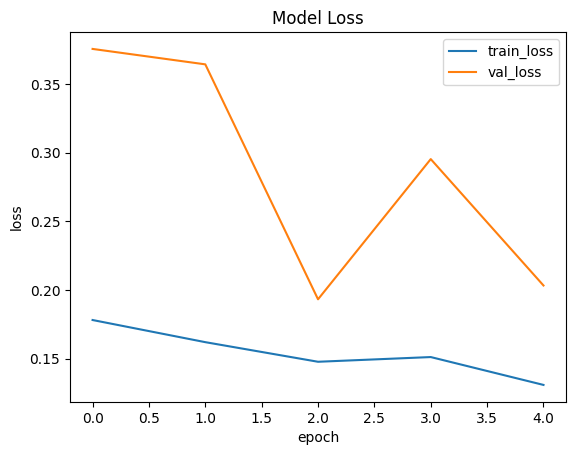

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

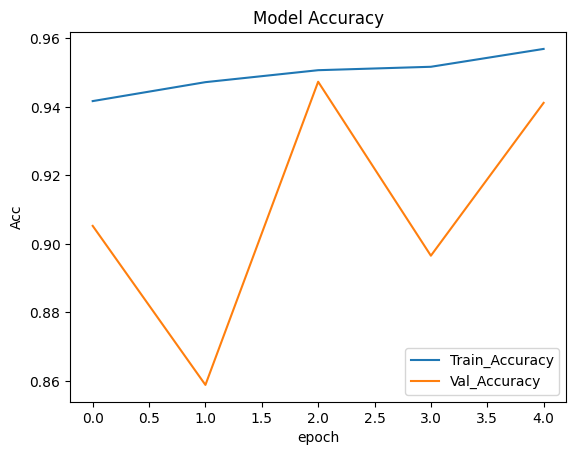

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('epoch')
plt.legend(['Train_Accuracy','Val_Accuracy'])
plt.show()

## Model Eval and Testing

In [21]:
test_dataset=test_dataset.batch(1)

In [29]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 22s 7ms/step - loss: 0.2700 - tp: 1244.0000 - fp: 89.0000 - tn: 1308.0000 - fn: 116.0000 - accuracy: 0.9256 - precision: 0.9332 - recall: 0.9147 - auc: 0.9692


[0.2700253129005432,
 1244.0,
 89.0,
 1308.0,
 116.0,
 0.925643801689148,
 0.9332333207130432,
 0.9147058725357056,
 0.9692308306694031]

In [41]:
Lenet_Model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 2s 2s/step


0.9981134

In [42]:
def parasite_or_not(x):
    if(x<0.5):
        return str('P')
    else:
        return str('U')

In [43]:
parasite_or_not(Lenet_Model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 2s 2s/step


'U'

1/1 [==============================] - 0s 20ms/step


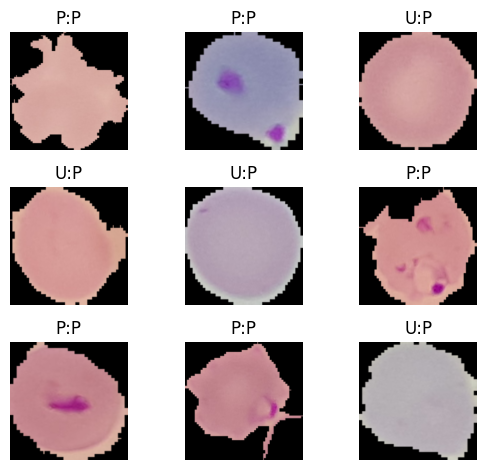

In [44]:
for i, (image, label) in enumerate(test_dataset.take(9)):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(model.predict(image)[0][0])))
    plt.axis('off')
    plt.tight_layout()

### Confusion Matrix

In [40]:
labels=[]
inp=[]
for x,y in test_dataset.as_numpy_iterator():
    labels.append(y)
    inp.append(x)

In [34]:
print(labels)

[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64),

In [39]:
labels=np.array([i[0] for i in labels])
print(labels)

[1 1 0 ... 1 0 0]


In [41]:
print(np.array(inp).shape)

(2757, 1, 224, 224, 3)


In [42]:
predicted = Lenet_Model.predict(np.array(inp)[:,0,:,:,:])

87/87 [==============================] - 4s 23ms/step


In [45]:
print(predicted[:,0])

[0.00564024 0.00169924 0.9661768  ... 0.965968   0.02233901 0.98552066]


[[1335   64]
 [ 117 1241]]


Text(0.5, 25.722222222222214, 'Predicted label')

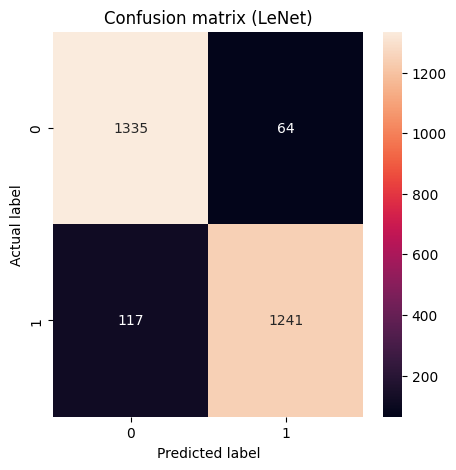

In [59]:
threshold=0.83
cm=confusion_matrix(labels,predicted[:,0]>threshold)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion matrix (LeNet)")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

### ROC Curves

In [51]:
fp, tp, th = roc_curve(labels, predicted[:,0])
print(len(fp),len(tp),len(th))

230 230 230


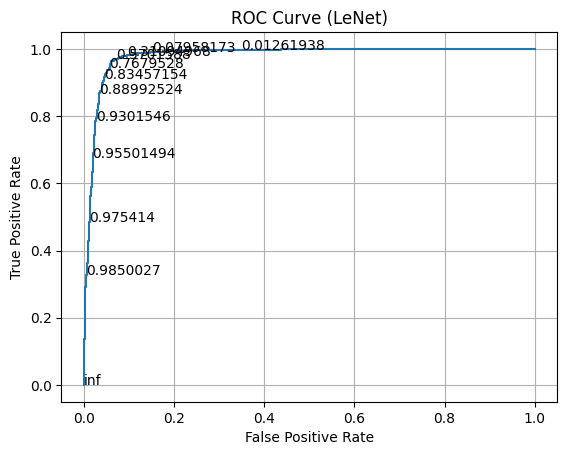

<Figure size 640x480 with 0 Axes>

In [58]:
plt.plot(fp,tp)
plt.title("ROC Curve (LeNet)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
for i in range(0,len(fp),20):
    plt.text(fp[i],tp[i],th[i])
plt.grid(True)
plt.show()
plt.tight_layout()